In [1]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
import mmcv
from mmdet.models import build_detector
from mmcv.runner import load_checkpoint
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np
import json
from collections import defaultdict
from skimage import draw
import pandas as pd
from tqdm import tqdm

In [95]:
pre_df = pd.read_csv('/mmdetection/demo/statistical_charts/precision.csv')
recall_df = pd.read_csv('/mmdetection/demo/statistical_charts/recall.csv')
f1_df = pd.read_csv('/mmdetection/demo/statistical_charts/f1_score.csv')
conf_to_precision = pre_df.to_dict('list')
conf_to_recall = recall_df.to_dict('list')
conf_to_f1 = f1_df.to_dict('list')

len(list(conf_to_precision.keys()))

11

(10,) (10,)


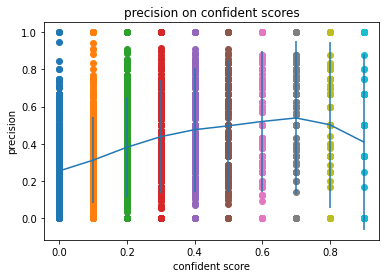

In [96]:
conf_scores = np.arange(0,1, 0.1)
#plot the raw observations:
for conf_score in conf_scores:
    precisions = list(conf_to_precision.values())[int(conf_score*10)+1]
    plt.scatter([conf_score]*len(precisions), precisions)

#plot the trend line
precision_mean = np.array([np.mean(v) for v in list(conf_to_precision.values())[1:]])
precision_std = np.array([np.std(v) for v in list(conf_to_precision.values())[1:]])
print(conf_scores.shape, precision_mean.shape)
plt.errorbar(conf_scores, precision_mean, yerr= precision_std)
plt.title('precision on confident scores')
plt.xlabel('confident score')
plt.ylabel('precision')
plt.savefig('statistical_charts/precision_on_conf_scores.png')
plt.show()

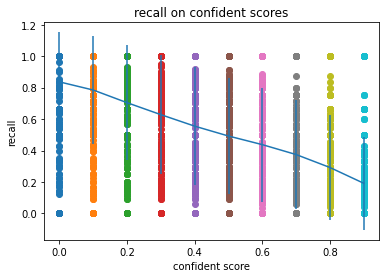

In [97]:
conf_scores = np.arange(0,1, 0.1)
#plot the raw observations:
for conf_score in conf_scores:
    recalls = list(conf_to_recall.values())[int(conf_score*10)+1]
    plt.scatter([conf_score]*len(recalls), recalls)
#plot the trend line
recall_mean = np.array([np.mean(v) for v in list(conf_to_recall.values())[1:]])
recall_std = np.array([np.std(v) for v in list(conf_to_recall.values())[1:]])
plt.errorbar(conf_scores, recall_mean, yerr= recall_std)
plt.title('recall on confident scores')
plt.xlabel('confident score')
plt.ylabel('recall')
plt.savefig('statistical_charts/recall_on_conf_scores.png')
plt.show()


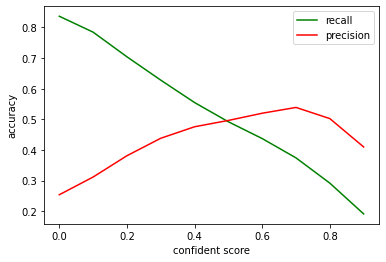

In [98]:
plt.plot(conf_scores, recall_mean, 'g', label = 'recall')
plt.plot(conf_scores, precision_mean, 'r', label = 'precision')
plt.xlabel('confident score')
plt.ylabel('accuracy')
plt.legend()
plt.savefig('statistical_charts/precision_recall_correlation.png')
plt.show()

## F1 score and determine ideal confident score

(10,) (10,)


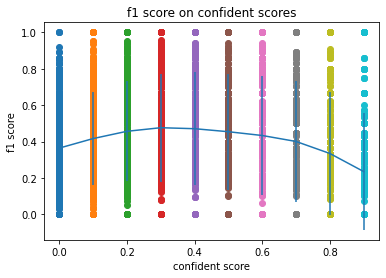

In [99]:
conf_scores = np.arange(0,1, 0.1)
#plot the raw observations:
for conf_score in conf_scores:
    f1_scores = list(conf_to_f1.values())[int(conf_score*10)+1]
    plt.scatter([conf_score]*len(f1_scores), f1_scores)

#plot the trend line
f1_mean = np.array([np.mean(v) for v in list(conf_to_f1.values())[1:]])
f1_std = np.array([np.std(v) for v in list(conf_to_f1.values())[1:]])
print(conf_scores.shape, f1_mean.shape)
plt.errorbar(conf_scores, f1_mean, yerr= f1_std)
plt.title('f1 score on confident scores')
plt.xlabel('confident score')
plt.ylabel('f1 score')
plt.savefig('statistical_charts/f1_score_on_conf_scores.png')
plt.show()

In [100]:
print('number of infered images: ',len((list(conf_to_f1.values()))[0]))
ideal_conf = np.argmax(f1_mean)/10
print('ideal confident score: ', ideal_conf)
best_f1 = np.max(f1_mean)
print('best F1 score: ', best_f1)

number of infered images:  536
ideal confident score:  0.3
best F1 score:  0.47595975287070874


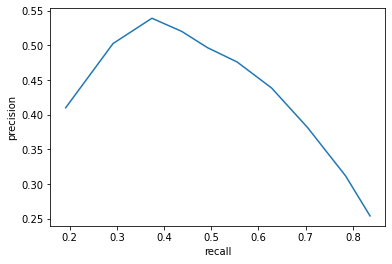

In [101]:
plt.plot(recall_mean, precision_mean)
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()